In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

/Users/zzheng/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs
!mkdir -p outputs/generator3

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

In [7]:
l1_lambda = 0.0001

# Tools for training

In [8]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [9]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [10]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [11]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [12]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [13]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [14]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:07, 15.74it/s]                         


Epoch 1 of 100
Generator loss: 2.01541162, Discriminator loss: 2.75969291


118it [00:07, 16.72it/s]                         


Epoch 2 of 100
Generator loss: 3.49807763, Discriminator loss: 2.44471049


118it [00:07, 16.65it/s]                         


Epoch 3 of 100
Generator loss: 5.66518211, Discriminator loss: 2.14969039


118it [00:07, 16.71it/s]                         


Epoch 4 of 100
Generator loss: 5.05794144, Discriminator loss: 2.14817286


118it [00:07, 16.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


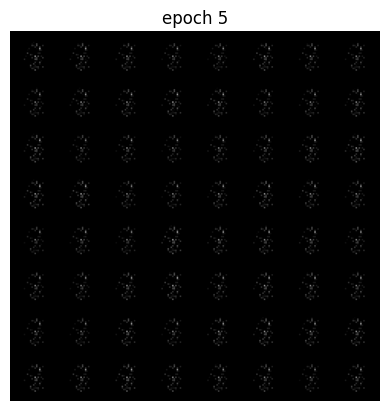

Epoch 5 of 100
Generator loss: 4.25823021, Discriminator loss: 1.94629824


118it [00:07, 16.38it/s]                         


Epoch 6 of 100
Generator loss: 4.97502136, Discriminator loss: 1.86094701


118it [00:07, 16.55it/s]                         


Epoch 7 of 100
Generator loss: 4.51821566, Discriminator loss: 1.83800256


118it [00:07, 16.56it/s]                         


Epoch 8 of 100
Generator loss: 4.76401806, Discriminator loss: 1.56590736


118it [00:07, 16.43it/s]                         


Epoch 9 of 100
Generator loss: 4.87941599, Discriminator loss: 1.59195685


118it [00:07, 16.62it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


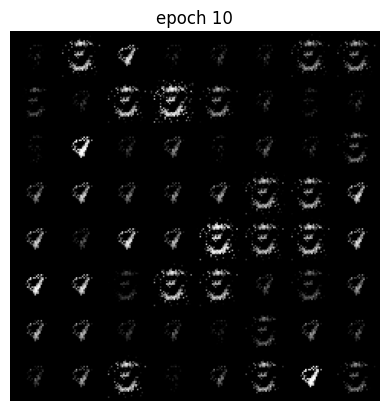

Epoch 10 of 100
Generator loss: 4.97815895, Discriminator loss: 1.40130138


118it [00:07, 16.44it/s]                         


Epoch 11 of 100
Generator loss: 5.17632055, Discriminator loss: 1.36631739


118it [00:07, 16.55it/s]                         


Epoch 12 of 100
Generator loss: 5.22331190, Discriminator loss: 1.25023985


118it [00:07, 16.63it/s]                         


Epoch 13 of 100
Generator loss: 5.52582979, Discriminator loss: 1.18778265


118it [00:07, 16.51it/s]                         


Epoch 14 of 100
Generator loss: 4.92105722, Discriminator loss: 1.28464055


118it [00:08, 14.56it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


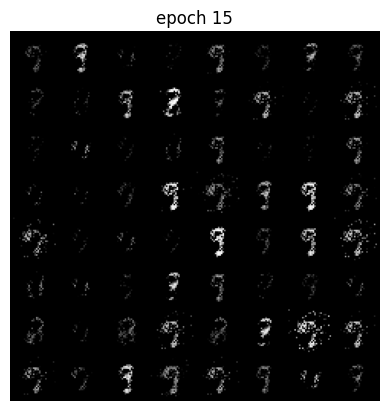

Epoch 15 of 100
Generator loss: 4.61852074, Discriminator loss: 1.15626991


118it [00:08, 14.30it/s]                         


Epoch 16 of 100
Generator loss: 4.98325729, Discriminator loss: 1.17960763


118it [00:08, 14.64it/s]                         


Epoch 17 of 100
Generator loss: 4.52474356, Discriminator loss: 1.16839969


118it [00:08, 14.27it/s]                         


Epoch 18 of 100
Generator loss: 4.97123766, Discriminator loss: 1.08504617


118it [00:08, 14.46it/s]                         


Epoch 19 of 100
Generator loss: 4.85241604, Discriminator loss: 1.06027198


118it [00:08, 14.37it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


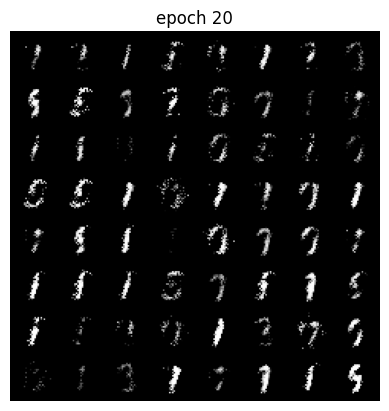

Epoch 20 of 100
Generator loss: 4.70851469, Discriminator loss: 1.13977218


118it [00:08, 14.53it/s]                         


Epoch 21 of 100
Generator loss: 4.58758593, Discriminator loss: 1.05363452


118it [00:08, 14.53it/s]                         


Epoch 22 of 100
Generator loss: 4.38493824, Discriminator loss: 1.06402290


118it [00:08, 14.49it/s]                         


Epoch 23 of 100
Generator loss: 4.04209518, Discriminator loss: 1.10316634


118it [00:08, 14.31it/s]                         


Epoch 24 of 100
Generator loss: 4.39274073, Discriminator loss: 1.00911081


118it [00:08, 14.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


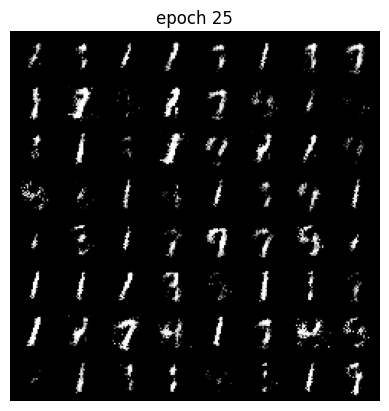

Epoch 25 of 100
Generator loss: 4.46381760, Discriminator loss: 1.00601161


118it [00:08, 14.42it/s]                         


Epoch 26 of 100
Generator loss: 4.26064301, Discriminator loss: 1.00064337


118it [00:08, 14.23it/s]                         


Epoch 27 of 100
Generator loss: 3.84510112, Discriminator loss: 1.04105568


118it [00:07, 14.99it/s]                         


Epoch 28 of 100
Generator loss: 3.74437022, Discriminator loss: 1.00607514


118it [00:07, 14.96it/s]                         


Epoch 29 of 100
Generator loss: 3.71506381, Discriminator loss: 0.98166507


118it [00:08, 14.37it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


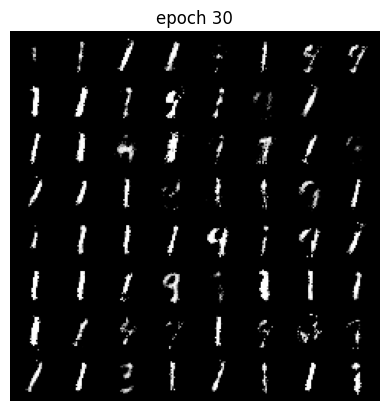

Epoch 30 of 100
Generator loss: 3.56316876, Discriminator loss: 0.98800915


118it [00:08, 14.38it/s]                         


Epoch 31 of 100
Generator loss: 3.45061445, Discriminator loss: 0.98370653


118it [00:08, 14.22it/s]                         


Epoch 32 of 100
Generator loss: 3.61615872, Discriminator loss: 0.94965541


118it [00:08, 14.23it/s]                         


Epoch 33 of 100
Generator loss: 3.62438059, Discriminator loss: 0.95880103


118it [00:08, 14.61it/s]                         


Epoch 34 of 100
Generator loss: 3.29083419, Discriminator loss: 0.98839968


118it [00:08, 14.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


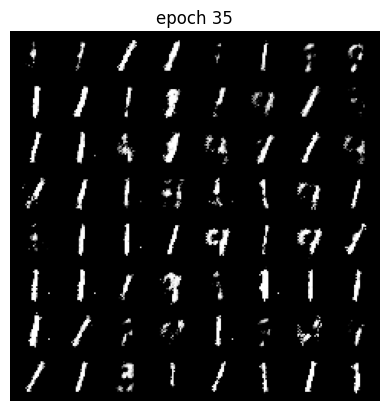

Epoch 35 of 100
Generator loss: 3.28261805, Discriminator loss: 0.96335101


118it [00:08, 14.73it/s]                         


Epoch 36 of 100
Generator loss: 3.05768585, Discriminator loss: 0.96164811


118it [00:07, 16.40it/s]                         


Epoch 37 of 100
Generator loss: 3.08594704, Discriminator loss: 0.94550699


118it [00:07, 16.79it/s]                         


Epoch 38 of 100
Generator loss: 3.13072085, Discriminator loss: 0.95241034


118it [00:07, 16.41it/s]                         


Epoch 39 of 100
Generator loss: 3.14716959, Discriminator loss: 0.92731267


118it [00:07, 16.37it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


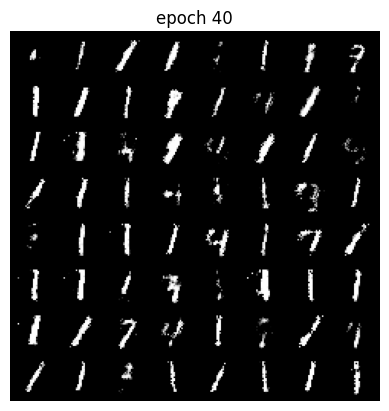

Epoch 40 of 100
Generator loss: 3.14405727, Discriminator loss: 0.92452008


118it [00:07, 16.24it/s]                         


Epoch 41 of 100
Generator loss: 3.09331560, Discriminator loss: 0.92199314


118it [00:07, 16.74it/s]                         


Epoch 42 of 100
Generator loss: 3.04068565, Discriminator loss: 0.92673337


118it [00:07, 16.63it/s]                         


Epoch 43 of 100
Generator loss: 2.94835520, Discriminator loss: 0.92952502


118it [00:07, 16.73it/s]                         


Epoch 44 of 100
Generator loss: 2.90323043, Discriminator loss: 0.93461400


118it [00:07, 16.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


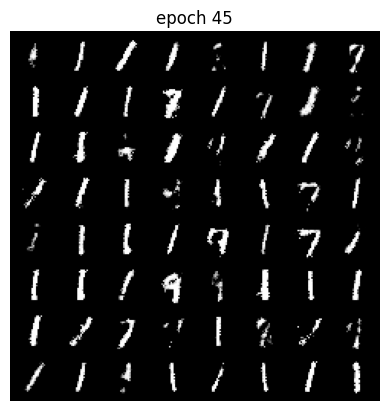

Epoch 45 of 100
Generator loss: 2.91289377, Discriminator loss: 0.94464368


118it [00:06, 16.86it/s]                         


Epoch 46 of 100
Generator loss: 2.77881384, Discriminator loss: 0.96086335


118it [00:07, 16.44it/s]                         


Epoch 47 of 100
Generator loss: 2.73334837, Discriminator loss: 0.98995459


118it [00:07, 16.35it/s]                         


Epoch 48 of 100
Generator loss: 2.74133396, Discriminator loss: 0.98170066


118it [00:07, 16.72it/s]                         


Epoch 49 of 100
Generator loss: 2.74547839, Discriminator loss: 1.00350010


118it [00:07, 16.55it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


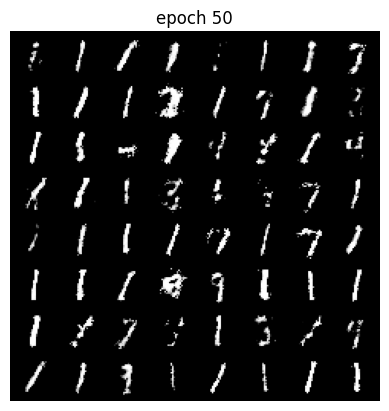

Epoch 50 of 100
Generator loss: 2.62560081, Discriminator loss: 1.01999903


118it [00:07, 16.56it/s]                         


Epoch 51 of 100
Generator loss: 2.59412527, Discriminator loss: 1.01997364


118it [00:07, 16.70it/s]                         


Epoch 52 of 100
Generator loss: 2.59097195, Discriminator loss: 1.01938641


118it [00:07, 16.45it/s]                         


Epoch 53 of 100
Generator loss: 2.60203862, Discriminator loss: 1.05183172


118it [00:07, 16.47it/s]                         


Epoch 54 of 100
Generator loss: 2.51714897, Discriminator loss: 1.06762660


118it [00:07, 16.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


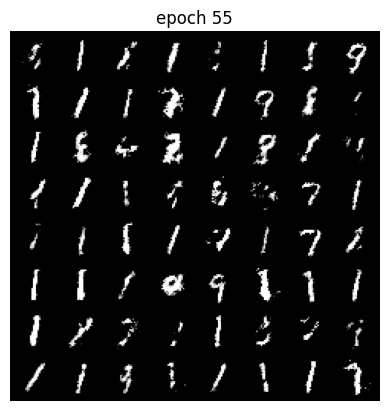

Epoch 55 of 100
Generator loss: 2.55912447, Discriminator loss: 1.05783391


118it [00:07, 16.69it/s]                         


Epoch 56 of 100
Generator loss: 2.44732738, Discriminator loss: 1.09228063


118it [00:07, 16.44it/s]                         


Epoch 57 of 100
Generator loss: 2.34942698, Discriminator loss: 1.06770539


118it [00:07, 16.55it/s]                         


Epoch 58 of 100
Generator loss: 2.44295549, Discriminator loss: 1.04393768


118it [00:07, 16.52it/s]                         


Epoch 59 of 100
Generator loss: 2.48163319, Discriminator loss: 1.04687297


118it [00:07, 16.24it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


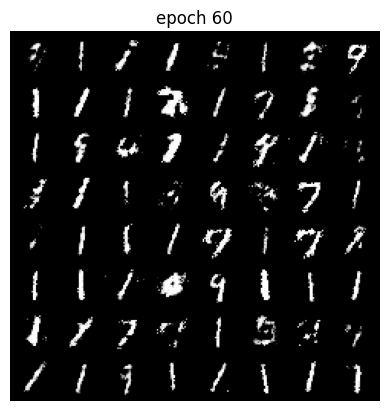

Epoch 60 of 100
Generator loss: 2.38361335, Discriminator loss: 1.08708537


118it [00:07, 16.39it/s]                         


Epoch 61 of 100
Generator loss: 2.32627916, Discriminator loss: 1.08736706


118it [00:07, 16.23it/s]                         


Epoch 62 of 100
Generator loss: 2.29869747, Discriminator loss: 1.11141944


118it [00:07, 16.34it/s]                         


Epoch 63 of 100
Generator loss: 2.25457311, Discriminator loss: 1.11588204


118it [00:07, 16.29it/s]                         


Epoch 64 of 100
Generator loss: 2.35933900, Discriminator loss: 1.08472502


118it [00:07, 16.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


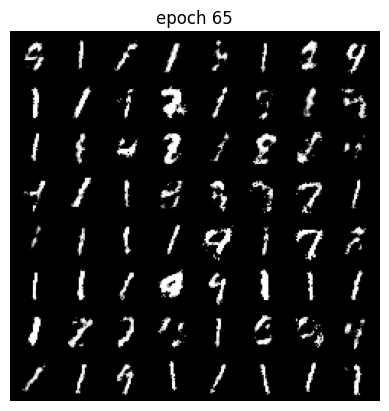

Epoch 65 of 100
Generator loss: 2.31456661, Discriminator loss: 1.09709072


118it [00:07, 16.28it/s]                         


Epoch 66 of 100
Generator loss: 2.17463160, Discriminator loss: 1.13010490


118it [00:07, 16.72it/s]                         


Epoch 67 of 100
Generator loss: 2.22498727, Discriminator loss: 1.14020908


118it [00:07, 16.75it/s]                         


Epoch 68 of 100
Generator loss: 2.21054173, Discriminator loss: 1.14235353


118it [00:07, 16.67it/s]                         


Epoch 69 of 100
Generator loss: 2.27622890, Discriminator loss: 1.13775313


118it [00:06, 17.03it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


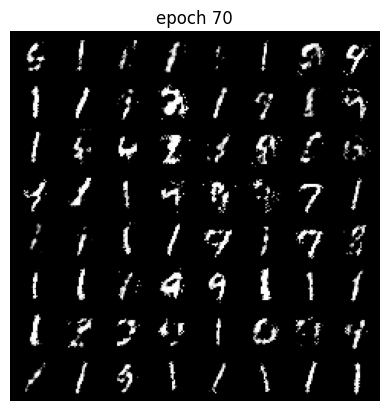

Epoch 70 of 100
Generator loss: 2.12811756, Discriminator loss: 1.17184699


118it [00:06, 17.04it/s]                         


Epoch 71 of 100
Generator loss: 2.20645189, Discriminator loss: 1.14317036


118it [00:07, 16.01it/s]                         


Epoch 72 of 100
Generator loss: 2.19046950, Discriminator loss: 1.17175853


118it [00:06, 16.86it/s]                         


Epoch 73 of 100
Generator loss: 2.11205268, Discriminator loss: 1.18527234


118it [00:06, 17.00it/s]                         


Epoch 74 of 100
Generator loss: 2.07696891, Discriminator loss: 1.18304694


118it [00:07, 16.14it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


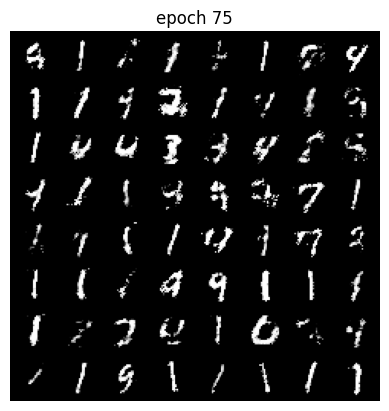

Epoch 75 of 100
Generator loss: 2.01575232, Discriminator loss: 1.22487676


118it [00:07, 16.02it/s]                         


Epoch 76 of 100
Generator loss: 2.03284860, Discriminator loss: 1.21363330


118it [00:07, 16.02it/s]                         


Epoch 77 of 100
Generator loss: 1.96890843, Discriminator loss: 1.23232436


118it [00:07, 16.18it/s]                         


Epoch 78 of 100
Generator loss: 1.92875099, Discriminator loss: 1.24461472


118it [00:07, 15.93it/s]                         


Epoch 79 of 100
Generator loss: 1.88946450, Discriminator loss: 1.25844932


118it [00:07, 15.76it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


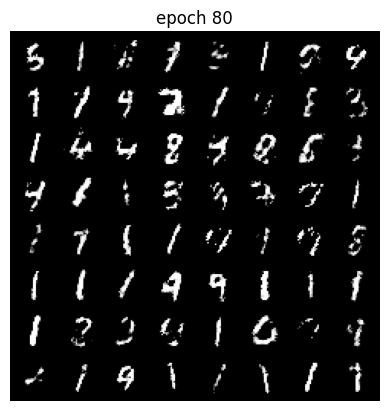

Epoch 80 of 100
Generator loss: 1.95468712, Discriminator loss: 1.25137782


118it [00:07, 15.83it/s]                         


Epoch 81 of 100
Generator loss: 1.92594874, Discriminator loss: 1.27710414


118it [00:07, 15.47it/s]                         


Epoch 82 of 100
Generator loss: 1.82070565, Discriminator loss: 1.30771947


118it [00:07, 15.34it/s]                         


Epoch 83 of 100
Generator loss: 1.88497281, Discriminator loss: 1.28466117


118it [00:07, 15.53it/s]                         


Epoch 84 of 100
Generator loss: 1.93864262, Discriminator loss: 1.24491358


118it [00:07, 15.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


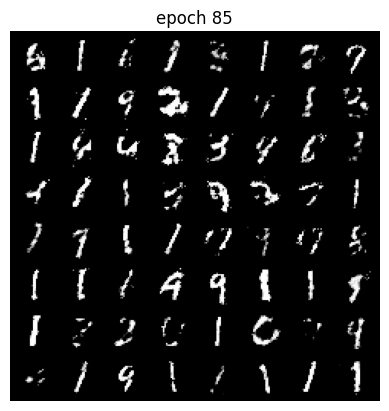

Epoch 85 of 100
Generator loss: 1.84700263, Discriminator loss: 1.27786970


118it [00:07, 15.86it/s]                         


Epoch 86 of 100
Generator loss: 1.82441437, Discriminator loss: 1.29811037


118it [00:07, 15.85it/s]                         


Epoch 87 of 100
Generator loss: 1.82656884, Discriminator loss: 1.31280041


118it [00:07, 16.08it/s]                         


Epoch 88 of 100
Generator loss: 1.85432827, Discriminator loss: 1.28716993


118it [00:07, 15.95it/s]                         


Epoch 89 of 100
Generator loss: 1.85929430, Discriminator loss: 1.28890598


118it [00:07, 15.92it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


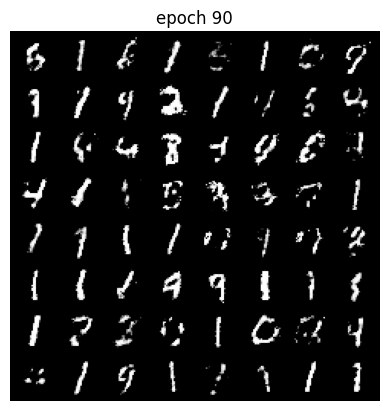

Epoch 90 of 100
Generator loss: 1.76193845, Discriminator loss: 1.33537745


118it [00:07, 16.10it/s]                         


Epoch 91 of 100
Generator loss: 1.70681953, Discriminator loss: 1.34546673


118it [00:07, 16.05it/s]                         


Epoch 92 of 100
Generator loss: 1.71187711, Discriminator loss: 1.35946798


118it [00:07, 15.93it/s]                         


Epoch 93 of 100
Generator loss: 1.72810102, Discriminator loss: 1.34791851


118it [00:07, 15.64it/s]                         


Epoch 94 of 100
Generator loss: 1.71486568, Discriminator loss: 1.35877776


118it [00:07, 15.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


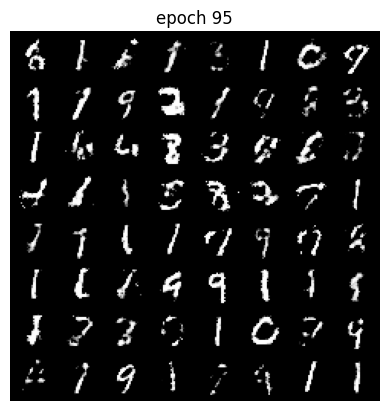

Epoch 95 of 100
Generator loss: 1.65937066, Discriminator loss: 1.38040268


118it [00:07, 16.00it/s]                         


Epoch 96 of 100
Generator loss: 1.61893392, Discriminator loss: 1.38543868


118it [00:07, 15.89it/s]                         


Epoch 97 of 100
Generator loss: 1.61482787, Discriminator loss: 1.39702296


118it [00:07, 15.92it/s]                         


Epoch 98 of 100
Generator loss: 1.63380742, Discriminator loss: 1.37407470


118it [00:07, 15.85it/s]                         


Epoch 99 of 100
Generator loss: 1.64126015, Discriminator loss: 1.37337506


118it [00:07, 15.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


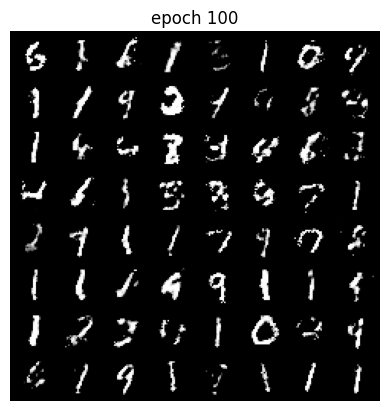

Epoch 100 of 100
Generator loss: 1.62704599, Discriminator loss: 1.37365139


In [15]:
torch.manual_seed(7777)
record = 0
def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    noise_in_training = create_noise(batch_size, nz)
    generated_data = generator(noise_in_training)
    discriminator_generator_data = discriminator(generated_data)
    return criterion(discriminator_generator_data, true_label)
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    noise_in_training = create_noise(batch_size, nz)
    generated_data = generator(noise_in_training)
    discriminator_data = discriminator(output)
    discriminator_loss_data = criterion(discriminator_data, label_real(discriminator_data.shape[0]))    
    discriminator_generator_data = discriminator(generated_data.detach())
    discriminator_loss_generator = criterion(discriminator_generator_data, label_fake(batch_size))
    return discriminator_loss_data + discriminator_loss_generator
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        data_x = data[0]
        data_y = data[1]
        
        optim_d.zero_grad()
        real_data_output = discriminator(data_x)
        loss_real = criterion(real_data_output, label_real(real_data_output.shape[0]))
        loss_real.backward(retain_graph=True) 
        optim_d.step()

        # Update discriminator on fake data
        noise_in_training = create_noise(batch_size, nz)
        fake_data = generator(noise_in_training).detach()  # Detach to avoid updating generator
        fake_data_output = discriminator(fake_data)
        loss_fake = criterion(fake_data_output, label_fake(batch_size))

        # Compute L1 regularization term
        l1_reg = torch.tensor(0.)
        for param in discriminator.parameters():
            l1_reg += torch.norm(param, 1)

        # Add L1 regularization to loss
        loss_discriminator = loss_fake + l1_lambda * l1_reg
        optim_d.zero_grad()  # Clear gradients from the first step
        loss_discriminator.backward()
        optim_d.step() 
        loss_d = loss_d + loss_real + loss_discriminator
        
        optim_g.zero_grad()
        # noise_in_training = create_noise(batch_size, nz)
        # generated_data = generator(noise_in_training)
        # discriminator_generator_data = discriminator(generated_data)
        # generator_loss_value = generator_loss(discriminator_generator_data, label_real(batch_size))
        generator_loss_value = generator_loss(None, label_real(batch_size))
        generator_loss_value.backward()
        optim_g.step()
        loss_g = loss_g + generator_loss_value  
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/generator3/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [19]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator3/generator.pth')

DONE TRAINING


In [17]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator3/generator_images.gif', imgs)

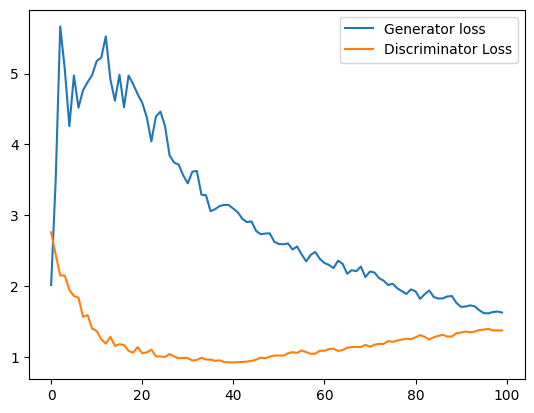

In [18]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot([g.item() for g in losses_g], label='Generator loss')
plt.plot([d.item() for d in losses_d], label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/generator3/loss.png')